In [52]:
from scipy import signal
import matplotlib.pyplot as plt
import soundfile as sdf

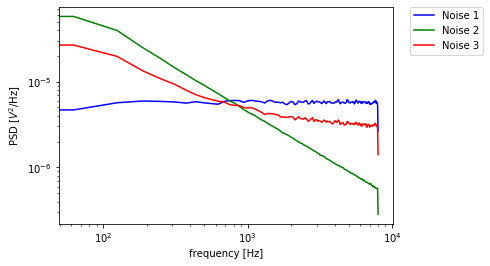

In [53]:
data_1, Fs_1 = sdf.read('noise1.wav')
data_2, Fs_2 = sdf.read('noise2.wav')
data_3, Fs_3 = sdf.read('noise3.wav')

# f_i Array of sample frequencies
# Psd_i Power spectral density of data_i
f_1, Psd_1 = signal.welch(data_1,Fs_1)
f_2, Psd_2 = signal.welch(data_2,Fs_2)
f_3, Psd_3 = signal.welch(data_3,Fs_3)

plt.semilogy(f_1, Psd_1,'b-',label='Noise 1')
plt.semilogy(f_2, Psd_2,'g-',label='Noise 2')
plt.semilogy(f_3, Psd_3,'r-',label='Noise 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [$V^2$/Hz]')
plt.xscale('log')
plt.yscale('log')
plt.show()

Then 
* the noise 1 is the white noise.
* the noise 2 is the pink noise.
* the noise 3 is the red noise.

### Simulate a noisy version of the music using the three noises using a global factor of 0.10.10.1 for each noise 

In [54]:
data, Fs = sdf.read('music.wav')
noisy_data = data + 0.1*data_1 + 0.1*data_2 + 0.1*data_3

### Denoise the sound using the Oracle Wiener filter.

In [59]:
denoised_music = signal.wiener(noisy_data)
sdf.write('Noisy_music.wav',noisy_data,Fs)
sdf.write('Denoised_music.wav',denoised_music,Fs)
Original_music = AudioSegment.from_wav('music.wav')
Noisy_music = AudioSegment.from_wav('NoisyMusic.wav')
Denoised_music = AudioSegment.from_wav('DenoisedMusic.wav')

In [60]:
print('Original music :')
Original_music

Original music :


In [61]:
print('Noisy music :')
Noisy_music

Noisy music :


In [62]:
print('Denoised music :')
Denoised_music

Denoised music :
